In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 2.xlsx")
df.head()

<IPython.core.display.Javascript object>

,C,H,N,O,S,Temp,Time,Pressure,Proteins,lipids,carbohydrates,Culture Condition,Catalyst,HHV,ERR,Yield%
0,72.7,8.8,6.3,11.5,0.6,300,30,130,53.0,7.5,11.0,open pond,Na2CO3,35.2,37.2,36.0
1,76.0,10.3,3.9,9.0,0.8,350,60,180,52.0,14.0,27.0,Flask,H-ZSM5,37.9,42.7,43.0
2,70.6,9.2,5.5,12.3,0.4,250,60,100,49.5,11.0,14.2,open pond,LiOH,33.8,33.0,33.0
3,69.1,8.4,5.0,15.2,0.5,250,30,100,45.6,12.1,NaN,PBR,NaN,34.8,41.5,24.7
4,72.0,8.8,6.2,9.9,0.3,375,50,221,34.0,23.0,21.0,NaN,Na2CO3,36.0,64.8,55.3


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [4]:
x=df.drop('HHV',axis=1)
y=df['HHV']
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
reg1=linear_model.LinearRegression()
reg1.fit(x_train,y_train)
y_pred1 = reg1.predict(x_train)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  0.3857226507030621


<IPython.core.display.Javascript object>

Root mean square error:  0.06321771634198378
R2 square:  0.977191836992484


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  0.09470544390264368


<IPython.core.display.Javascript object>

Root mean square error:  1.3849439267286388e-30
R2 square:  0.9988192723742975


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

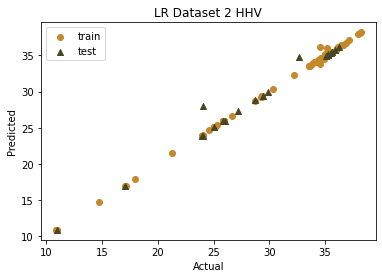

In [5]:
plt.scatter(y_pred1,y_train,label='train',color='#c3892b')
plt.scatter(y_pred,y_test,label='test',color='#494623',marker ="^")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("LR Dataset 2 HHV")
plt.legend()